# Initialization
## Libraries Import

In [23]:
%matplotlib inline

In [24]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import sys


# Acquiring image and template

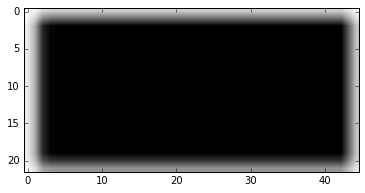

In [36]:
imagename = 'pattern_0001_scan.png'
img = cv2.imread(imagename, 0)
template = cv2.imread('blackRec.png', 0)

w, h = template.shape[::-1] # Template dimensions

plt.imshow(img, cmap="gray")
plt.show()

plt.imshow(template, cmap="gray")
plt.show()

# Binary Threshold

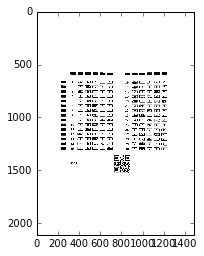

In [37]:
ret, img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

plt.imshow(img, cmap="gray")
plt.show()

# Template Matching


In [27]:
res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.72
loc = np.where( res >= threshold)

## Filtering matches

In [28]:
j = (-21,-21)
initMatches = list(zip(*loc[::-1]))
initMatches.sort()
filteredMatches = []
finalMatches = []

def getKey(item):
    return item[1]

for i in initMatches:
    if abs(i[0] - j[0]) > 20 or abs(i[1] - j[1]) > 20:
        filteredMatches.append(i)
        j = i

filteredMatches = sorted(filteredMatches, key=getKey)

j = (-21,-21)
for i in filteredMatches:
    if abs(i[0] - j[0]) > 20 or abs(i[1] - j[1]) > 20:
        finalMatches.append(i)
        j = i

## Printing Matches on image (Black Rectangles)

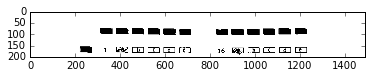

In [41]:
for pt in finalMatches:
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    
plt.imshow(img[500:700], cmap="gray")
plt.show()

# Creating lists of coordinates

In [30]:
x_list = []
y_list = []

for pt in finalMatches[:12]:
    x_list.append(pt[0])
for pt in finalMatches[12:]:
    y_list.append(pt[1])

# Removing the number columns

In [31]:
x_list.sort()
del x_list[0]
del x_list[5]

# Creating histograms list for each rectangle

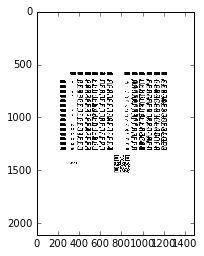

In [45]:
a = 0
hists = []
for i in x_list:
    for j in y_list:
        cv2.rectangle(img, (i,j), (i + w, j + h), (0,0,255), 2)
        cv2.putText(img, "%d" % a, (i - 5, j), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 2)
        window = img[j:j + h, i:i + w]
        hists.append(cv2.calcHist([window], [0], None, [2], [0,256]))
        a += 1

plt.imshow(img, cmap="gray")
plt.show()

# Associate rectangles' indexes to each question

In [33]:
questions = []

for i in range(15):
    question = []
    for j in range(5):
        question.append(i + j*15)
    questions.append(question)

for i in range(15):
    question = []
    for j in range(5):
        question.append(75 + i + j*15)
    questions.append(question)

# Final Results

In [52]:
answer_file = open(imagename + '.ans', 'w+')
answer_model = ['A','B','C','D','E','Branco','Nulo']

for k in range(30):
    question = questions[k]
    x = 5
    for i in range(5):
        rate = hists[question[i]][0]/(hists[question[i]][0] + hists[question[i]][1])
        if rate > 0.55:
            if x == 5:
                x = i
            else:
                x = 6
                break
    answer_file.write(('%d: ' % (k+1)) + answer_model[x] + '\n')
    
for line in answer_file:
    print (line)


1: A

2: B

3: A

4: Branco

5: B

6: C

7: C

8: C

9: Nulo

10: C

11: B

12: A

13: C

14: Branco

15: E

16: A

17: A

18: D

19: Branco

20: Nulo

21: B

22: C

23: Nulo

24: C

25: C

26: Branco

27: D

28: C

29: B

30: B

